# Introduction 
This Dataset is about Water points around Kenya, with different coordinates, I am interested in the  population living around certain water points and if the increase of the population is inversely correlated to the Decrease of the Groundwater and the recharge of Aquifers. Besides, I am also interested in the sufficiency of the water for future purposes based on the use of the population and sustainability. Also I would like to check if there are alternatives sources to the groundwater sources of water. 

One of the challenges I foresee is that the dataset is too huge, and has a lot of missing values. Which means when cleaning the data it will take me a long time to actually narrow down to the training set. 

Some of my reccomendations include 
* Recommendations of other sources of water if none are available
* Geographical distribution of the water points and how far the population is from the access points. 
* Recommendations of sustainability of the water resources. Either how to recharge Aquifers, or using green roof technologies etc. 
* Predict the water point status, those with high-risks need constant monitoring as compared to low-risks.

Similar case studies have been done on GIS mapping and how to locate the water points and what measures need to be implemented to ensure sufficiency of the water in the near future. Importing Libraries 


# Objective
1. Exploratory Data Analysis
2. Preparing the data through handling missing values and 
3. Training and making predictions using a classification model
4. Model evaluation

## 1. Exploratory Analysis

1.1. Importing Libraries

In [980]:
#Include libraries to be used
%matplotlib inline
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
#import pandas_profiling
#mport pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV 
import statsmodels.api as sm
from sklearn.datasets import load_boston
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
from scipy.cluster import hierarchy
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn import cluster, decomposition, pipeline, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.plotting.register_matplotlib_converters()
import statsmodels
import warnings
warnings.filterwarnings("ignore")

# 2. Data Cleansing 

## 2.1 Loading Data Set 

In [981]:
df = pd.read_csv('Groundwater Levels Dataset.csv')

In [982]:
df.head()

,row_id,source,lat_deg,lon_deg,report_date,status_id,water_source,water_source_clean,water_tech_clean,water_tech,...,clean_adm2,clean_adm3,water_tech_original,water_source_original,lat_deg_original,lon_deg_original,management_clean,management_original,water_source_category,water_tech_category
0,305581,Living Water International,0.084950,34.758200,2014-08-25T00:00:00.000,Yes,Borehole,Borehole,NaN,Afridev,...,Sabatia,North Maragoli,afridev,borehole,NaN,NaN,NaN,NaN,Well,NaN
1,438590,Evidence Action,-1.069960,34.376673,2014-12-03T00:00:00.000,Yes,Borehole,Borehole,NaN,NaN,...,Suna West,Wiga,NaN,borehole,NaN,NaN,NaN,NaN,Well,NaN
2,438613,Evidence Action,-3.944009,39.743856,2014-03-13T00:00:00.000,Yes,Borehole,Borehole,NaN,NaN,...,Kilifi South,Shimo La Tewa,NaN,borehole,NaN,NaN,NaN,NaN,Well,NaN
3,438944,Evidence Action,0.142013,34.781176,2014-03-20T00:00:00.000,Yes,Protected Spring,Protected Spring,NaN,NaN,...,Sabatia,Busali,NaN,protected spring,NaN,NaN,NaN,NaN,Spring,NaN
4,438982,Evidence Action,-0.903839,34.528232,2014-03-20T00:00:00.000,Yes,Borehole,Borehole,NaN,NaN,...,Awendo,Central Sakwa,NaN,borehole,NaN,NaN,NaN,NaN,Well,NaN


In [983]:
df.head().T

,0,1,2,3,4
row_id,305581,438590,438613,438944,438982
source,Living Water International,Evidence Action,Evidence Action,Evidence Action,Evidence Action
lat_deg,0.08495,-1.06996,-3.944009,0.142013,-0.903839
lon_deg,34.7582,34.376673,39.743856,34.781176,34.528232
report_date,2014-08-25T00:00:00.000,2014-12-03T00:00:00.000,2014-03-13T00:00:00.000,2014-03-20T00:00:00.000,2014-03-20T00:00:00.000
status_id,Yes,Yes,Yes,Yes,Yes
water_source,Borehole,Borehole,Borehole,Protected Spring,Borehole
water_source_clean,Borehole,Borehole,Borehole,Protected Spring,Borehole
water_tech_clean,NaN,NaN,NaN,NaN,NaN
water_tech,Afridev,NaN,NaN,NaN,NaN


In [984]:
df.tail()

,row_id,source,lat_deg,lon_deg,report_date,status_id,water_source,water_source_clean,water_tech_clean,water_tech,...,clean_adm2,clean_adm3,water_tech_original,water_source_original,lat_deg_original,lon_deg_original,management_clean,management_original,water_source_category,water_tech_category
995,373423,Engineering Sciences and Global Development,-0.597233,34.17425,2011-02-01T00:00:00.000,Yes,H. Protected spring,Protected Spring,NaN,NaN,...,Suba,Kaksingri West,NaN,h. protected spring,NaN,NaN,Community Management,management committee,Spring,NaN
996,373613,Engineering Sciences and Global Development,-0.717117,34.14050,2011-02-05T00:00:00.000,Yes,E. Borehole with hand pump,Borehole,NaN,NaN,...,Suba,Gwassi South,e. borehole with hand pump,e. borehole with hand pump,NaN,NaN,Community Management,management committee,Well,NaN
997,373586,Engineering Sciences and Global Development,-0.635683,34.22112,2011-02-03T00:00:00.000,Yes,E. Borehole with hand pump,Borehole,NaN,NaN,...,Suba,Gwassi South,e. borehole with hand pump,e. borehole with hand pump,NaN,NaN,Community Management,management committee,Well,NaN
998,373298,Engineering Sciences and Global Development,-0.514750,34.59428,2011-09-02T00:00:00.000,Yes,F. Protected dug well with hand pump,Protected Shallow Well,NaN,NaN,...,Rangwe,Kagan,f. protected dug well with hand pump,f. protected dug well with hand pump,NaN,NaN,Community Management,management committee,Well,NaN
999,373581,Engineering Sciences and Global Development,-0.536717,34.26015,2011-01-25T00:00:00.000,No,L. Surface water,Surface Water (River/Stream/Lake/Pond/Dam),NaN,NaN,...,Mbita,Gembe,NaN,l. surface water,NaN,NaN,No Management,no management,Surface Water,NaN


In [985]:
df.shape 

(1000, 52)

In [986]:
df.describe()

,row_id,lat_deg,lon_deg,water_tech_clean,install_year,installer,_rehab_year,_rehabilitator,fecal_coliform_value,fecal_coliform_presence,scheme_id,count,lat_deg_original,lon_deg_original,water_tech_category
count,1000.000000,1000.000000,1000.000000,0.0,891.000000,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0
mean,216642.560000,1.236579,35.997494,NaN,2009.763187,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
std,157624.827188,1.711965,1.719956,NaN,9.808906,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
min,33438.000000,-3.944009,34.008690,NaN,1920.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
25%,33712.750000,-0.105875,34.533833,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
50%,306463.500000,0.237941,34.842417,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
75%,353502.250000,3.170796,37.459183,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
max,527933.000000,4.338262,39.911217,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [987]:
df.nunique()

row_id                     1000
source                        5
lat_deg                     871
lon_deg                     867
report_date                 322
status_id                     3
water_source                 35
water_source_clean           10
water_tech_clean              0
water_tech                    5
_facility_type                4
country_name                  1
adm1                          2
adm2                          4
_adm3                        10
install_year                 46
installer                     0
_rehab_year                   0
_rehabilitator                0
management                    8
pay                           3
status                       12
fecal_coliform_value          0
fecal_coliform_presence       0
subjective_quality            1
activity_id                 559
scheme_id                     0
notes                       163
photo_lnk                     1
orig_lnk                    421
data_lnk                      6
public_d

In [988]:
df.columns 

Index(['row_id', 'source', 'lat_deg', 'lon_deg', 'report_date', 'status_id',
       'water_source', 'water_source_clean', 'water_tech_clean', 'water_tech',
       '_facility_type', 'country_name', 'adm1', 'adm2', '_adm3',
       'install_year', 'installer', '_rehab_year', '_rehabilitator',
       'management', 'pay', 'status', 'fecal_coliform_value',
       'fecal_coliform_presence', 'subjective_quality', 'activity_id',
       'scheme_id', 'notes', 'photo_lnk', 'orig_lnk', 'data_lnk',
       'public_data_source', 'converted', 'country_id', 'lat_lon_deg',
       'created_timestamp', 'updated', 'geocoded_column', 'count',
       'clean_country_id', 'clean_country_name', 'clean_adm1', 'clean_adm2',
       'clean_adm3', 'water_tech_original', 'water_source_original',
       'lat_deg_original', 'lon_deg_original', 'management_clean',
       'management_original', 'water_source_category', 'water_tech_category'],
      dtype='object')

In [989]:
df.info

<bound method DataFrame.info of      row_id                                       source   lat_deg    lon_deg  \
0    305581                   Living Water International  0.084950  34.758200   
1    438590                              Evidence Action -1.069960  34.376673   
2    438613                              Evidence Action -3.944009  39.743856   
3    438944                              Evidence Action  0.142013  34.781176   
4    438982                              Evidence Action -0.903839  34.528232   
..      ...                                          ...       ...        ...   
995  373423  Engineering Sciences and Global Development -0.597233  34.174250   
996  373613  Engineering Sciences and Global Development -0.717117  34.140500   
997  373586  Engineering Sciences and Global Development -0.635683  34.221120   
998  373298  Engineering Sciences and Global Development -0.514750  34.594280   
999  373581  Engineering Sciences and Global Development -0.536717  34.260150

## 2.2 Dealing with Missing Values 

In [990]:
df.isnull().values.any()

True

In [991]:
df.isna().any()

row_id                     False
source                     False
lat_deg                    False
lon_deg                    False
report_date                False
status_id                  False
water_source               False
water_source_clean          True
water_tech_clean            True
water_tech                  True
_facility_type              True
country_name               False
adm1                        True
adm2                        True
_adm3                       True
install_year                True
installer                   True
_rehab_year                 True
_rehabilitator              True
management                  True
pay                         True
status                      True
fecal_coliform_value        True
fecal_coliform_presence     True
subjective_quality          True
activity_id                 True
scheme_id                   True
notes                       True
photo_lnk                   True
orig_lnk                    True
data_lnk  

'water_source', 'water_source_clean', 'water_tech_clean', 'water_tech',
'_facility_type', 'adm1', 'adm2', '_adm3',
'install_year', 'installer', '_rehab_year', '_rehabilitator',
'management', 'pay', 'status', 'fecal_coliform_value',
'fecal_coliform_presence', 'subjective_quality', 'activity_id',
'scheme_id', 'notes', 'photo_lnk', 'orig_lnk', 'data_lnk',
'public_data_source', 'converted', 'country_id', 'lat_lon_deg',
'created_timestamp', 'updated', 'geocoded_column', 'count',
'clean_country_id', 'clean_country_name', 'clean_adm1', 'clean_adm2',
'clean_adm3', 'water_tech_original', 'water_source_original',
'lat_deg_original', 'lon_deg_original', 'management_clean',
'management_original', 'water_source_category', 'water_tech_category'

In [992]:
df.columns

Index(['row_id', 'source', 'lat_deg', 'lon_deg', 'report_date', 'status_id',
       'water_source', 'water_source_clean', 'water_tech_clean', 'water_tech',
       '_facility_type', 'country_name', 'adm1', 'adm2', '_adm3',
       'install_year', 'installer', '_rehab_year', '_rehabilitator',
       'management', 'pay', 'status', 'fecal_coliform_value',
       'fecal_coliform_presence', 'subjective_quality', 'activity_id',
       'scheme_id', 'notes', 'photo_lnk', 'orig_lnk', 'data_lnk',
       'public_data_source', 'converted', 'country_id', 'lat_lon_deg',
       'created_timestamp', 'updated', 'geocoded_column', 'count',
       'clean_country_id', 'clean_country_name', 'clean_adm1', 'clean_adm2',
       'clean_adm3', 'water_tech_original', 'water_source_original',
       'lat_deg_original', 'lon_deg_original', 'management_clean',
       'management_original', 'water_source_category', 'water_tech_category'],
      dtype='object')

In [993]:
df.drop(['water_source_clean', 'water_tech_clean', 'water_tech','_facility_type', 'adm1', 'adm2', '_adm3','install_year',\
'installer', '_rehab_year', 'status_id', '_rehabilitator', 'management', 'report_date', 'pay', 'source', 'fecal_coliform_value','fecal_coliform_presence',\
'subjective_quality', 'activity_id','scheme_id', 'notes', 'photo_lnk', 'orig_lnk', 'data_lnk','public_data_source', 'converted',\
'country_id', 'lat_lon_deg','created_timestamp', 'updated', 'geocoded_column', 'count','clean_country_id','clean_country_name', \
'water_tech_original', 'water_tech_category', 'lat_deg_original', 'lon_deg_original', 'management_clean','management_original',],\
axis='columns', inplace=True)
df

,row_id,lat_deg,lon_deg,water_source,country_name,status,clean_adm1,clean_adm2,clean_adm3,water_source_original,water_source_category
0,305581,0.084950,34.758200,Borehole,Kenya,NaN,Vihiga,Sabatia,North Maragoli,borehole,Well
1,438590,-1.069960,34.376673,Borehole,Kenya,NaN,Migori,Suna West,Wiga,borehole,Well
2,438613,-3.944009,39.743856,Borehole,Kenya,NaN,Kilifi,Kilifi South,Shimo La Tewa,borehole,Well
3,438944,0.142013,34.781176,Protected Spring,Kenya,NaN,Vihiga,Sabatia,Busali,protected spring,Spring
4,438982,-0.903839,34.528232,Borehole,Kenya,NaN,Migori,Awendo,Central Sakwa,borehole,Well
...,...,...,...,...,...,...,...,...,...,...,...
995,373423,-0.597233,34.174250,H. Protected spring,Kenya,NaN,Homa Bay,Suba,Kaksingri West,h. protected spring,Spring
996,373613,-0.717117,34.140500,E. Borehole with hand pump,Kenya,NaN,Homa Bay,Suba,Gwassi South,e. borehole with hand pump,Well
997,373586,-0.635683,34.221120,E. Borehole with hand pump,Kenya,NaN,Homa Bay,Suba,Gwassi South,e. borehole with hand pump,Well
998,373298,-0.514750,34.594280,F. Protected dug well with hand pump,Kenya,NaN,Homa Bay,Rangwe,Kagan,f. protected dug well with hand pump,Well


# 1.4 Data Preparation 

In [994]:
df.columns

Index(['row_id', 'lat_deg', 'lon_deg', 'water_source', 'country_name',
       'status', 'clean_adm1', 'clean_adm2', 'clean_adm3',
       'water_source_original', 'water_source_category'],
      dtype='object')

In [995]:
#Create a DataFrame
location = []
for i, row in df.iterrows():
    location.append([row['lat_deg'],row['lon_deg']])
df['location'] = location
df

,row_id,lat_deg,lon_deg,water_source,country_name,status,clean_adm1,clean_adm2,clean_adm3,water_source_original,water_source_category,location
0,305581,0.084950,34.758200,Borehole,Kenya,NaN,Vihiga,Sabatia,North Maragoli,borehole,Well,"[0.08495, 34.7582]"
1,438590,-1.069960,34.376673,Borehole,Kenya,NaN,Migori,Suna West,Wiga,borehole,Well,"[-1.069959696, 34.37667327]"
2,438613,-3.944009,39.743856,Borehole,Kenya,NaN,Kilifi,Kilifi South,Shimo La Tewa,borehole,Well,"[-3.94400929, 39.74385557]"
3,438944,0.142013,34.781176,Protected Spring,Kenya,NaN,Vihiga,Sabatia,Busali,protected spring,Spring,"[0.142013409, 34.78117555]"
4,438982,-0.903839,34.528232,Borehole,Kenya,NaN,Migori,Awendo,Central Sakwa,borehole,Well,"[-0.903838672, 34.5282323]"
...,...,...,...,...,...,...,...,...,...,...,...,...
995,373423,-0.597233,34.174250,H. Protected spring,Kenya,NaN,Homa Bay,Suba,Kaksingri West,h. protected spring,Spring,"[-0.5972334, 34.17425]"
996,373613,-0.717117,34.140500,E. Borehole with hand pump,Kenya,NaN,Homa Bay,Suba,Gwassi South,e. borehole with hand pump,Well,"[-0.7171167, 34.1405]"
997,373586,-0.635683,34.221120,E. Borehole with hand pump,Kenya,NaN,Homa Bay,Suba,Gwassi South,e. borehole with hand pump,Well,"[-0.6356834, 34.22112]"
998,373298,-0.514750,34.594280,F. Protected dug well with hand pump,Kenya,NaN,Homa Bay,Rangwe,Kagan,f. protected dug well with hand pump,Well,"[-0.51475, 34.59428]"


In [996]:
cols = set(df.columns)
cols_numeric = set(['row_id','location','lat_deg', 'lon_deg','report_date'])
cols_categorical = list(cols - cols_numeric)
cols_categorical

['water_source_category',
 'clean_adm3',
 'status',
 'water_source',
 'clean_adm2',
 'clean_adm1',
 'country_name',
 'water_source_original']

# 2. Visualization

<AxesSubplot:>

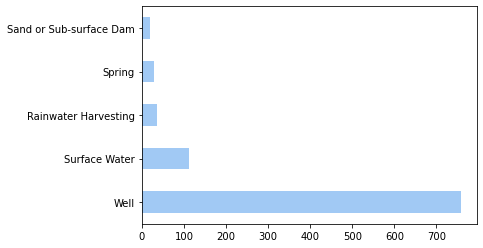

In [997]:
df.water_source_category.value_counts().plot.barh()

<AxesSubplot:>

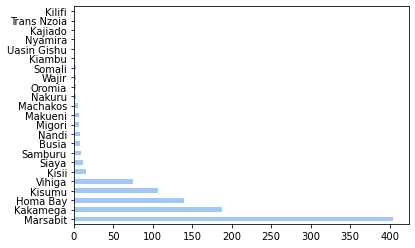

In [998]:
#shows that most dug up areas include marsabit, as compared to Kilifi which are dug but no water is found.
df.clean_adm1.value_counts().plot.barh()

<AxesSubplot:>

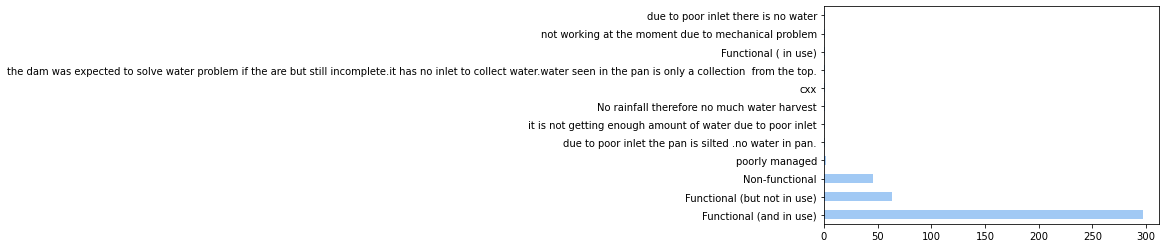

In [999]:
df.status.value_counts().plot.barh()

In [1000]:
df.location.describe()

count                          1000
unique                          908
top       [3.17079589, 36.91758347]
freq                             39
Name: location, dtype: object

In [1001]:
arr = np.array(location)

<AxesSubplot:ylabel='Frequency'>

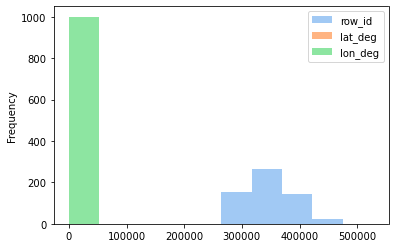

In [1002]:
df.plot.hist(['lat_deg', 'lon_deg'])

<AxesSubplot:>

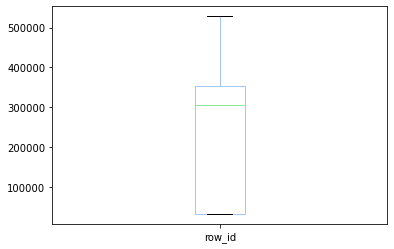

In [1003]:
df.row_id.plot.box()

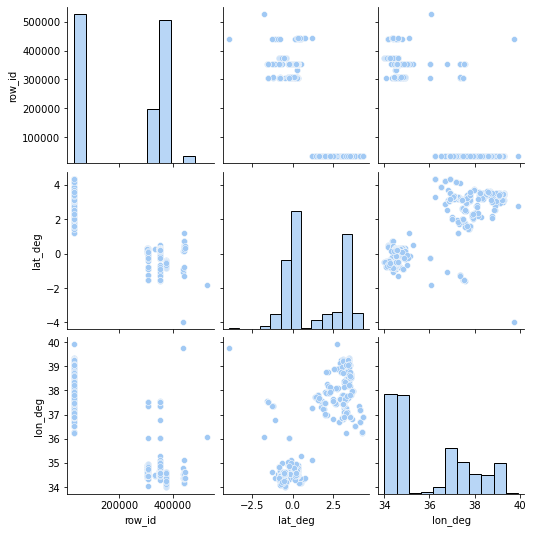

In [1004]:
sns.pairplot(df)

In [1005]:
#Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
        f'{x.capitalize()}(min) : {x_min}\n'
        f'Q1                    : {Q1}\n'
        f'Q2(Median)            : {Q2}\n'
        f'Q3                    : {Q3}\n'
        f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(df[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = df[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(df[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Row_id Attribute:
Row_id(min) : 33438
Q1                    : 33712.75
Q2(Median)            : 306463.5
Q3                    : 353502.25
Row_id(max) : 527933


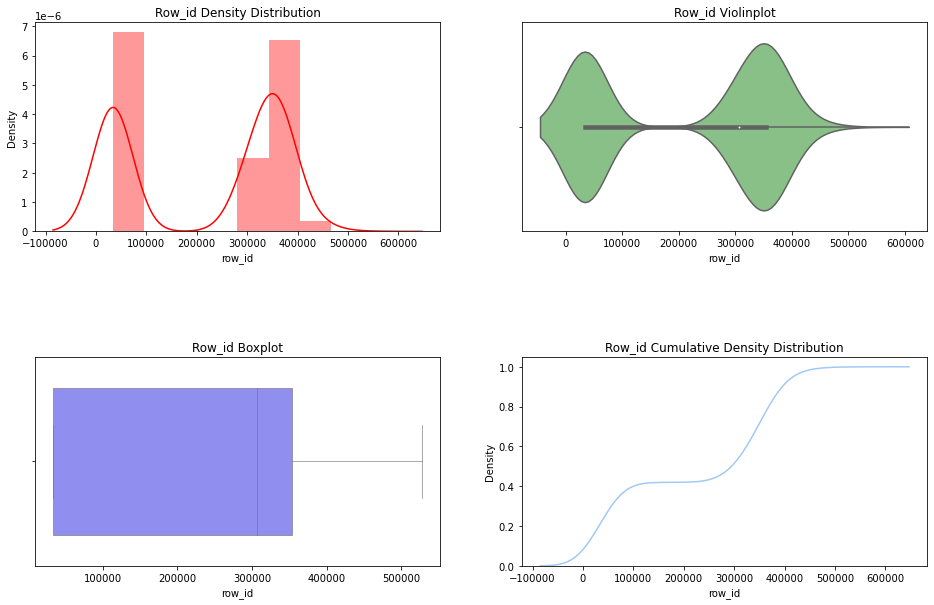

In [1006]:
summary('row_id')

In [1007]:
df.columns

Index(['row_id', 'lat_deg', 'lon_deg', 'water_source', 'country_name',
       'status', 'clean_adm1', 'clean_adm2', 'clean_adm3',
       'water_source_original', 'water_source_category', 'location'],
      dtype='object')

<AxesSubplot:xlabel='row_id', ylabel='clean_adm1'>

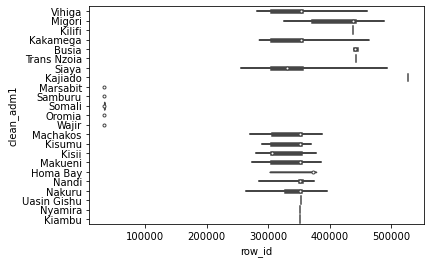

In [1008]:
# 2D Categorical vs Continuous
sns.violinplot(x='row_id', y='clean_adm1', data=df)

<AxesSubplot:>

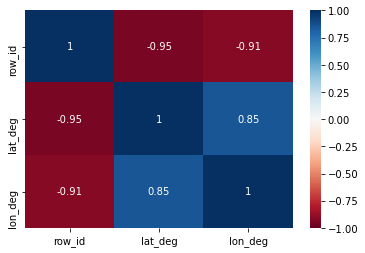

In [1009]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

# 3. Machine Learning 